In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../input/brainstroke/brain_stroke.csv')

In [3]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
data.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [5]:
data.shape

(4981, 11)

In [6]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [10]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [11]:
data.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [12]:
data_cat = data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                 'smoking_status', 'stroke']]

In [13]:
for i in data_cat.columns:
    print(data_cat[i].unique())

['Male' 'Female']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


In [14]:
for i in data_cat.columns:
    print(data_cat[i].value_counts())

Female    2907
Male      2074
Name: gender, dtype: int64
0    4502
1     479
Name: hypertension, dtype: int64
0    4706
1     275
Name: heart_disease, dtype: int64
Yes    3280
No     1701
Name: ever_married, dtype: int64
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64
0    4733
1     248
Name: stroke, dtype: int64


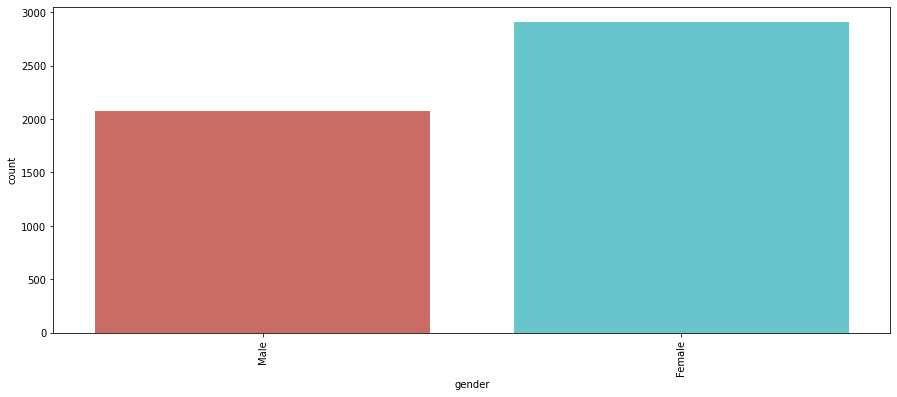

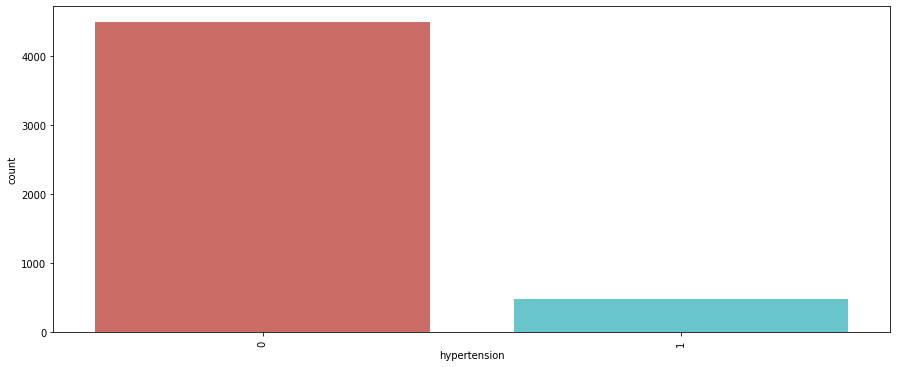

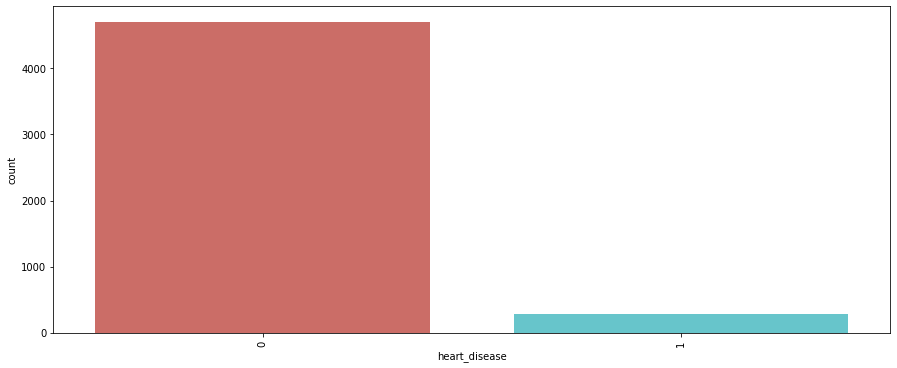

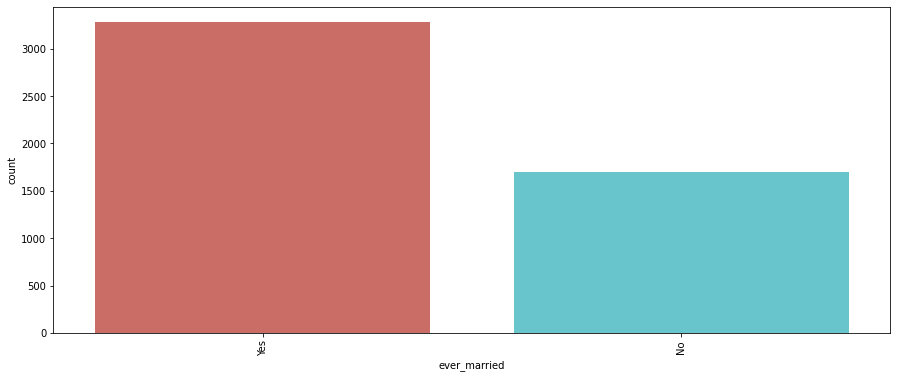

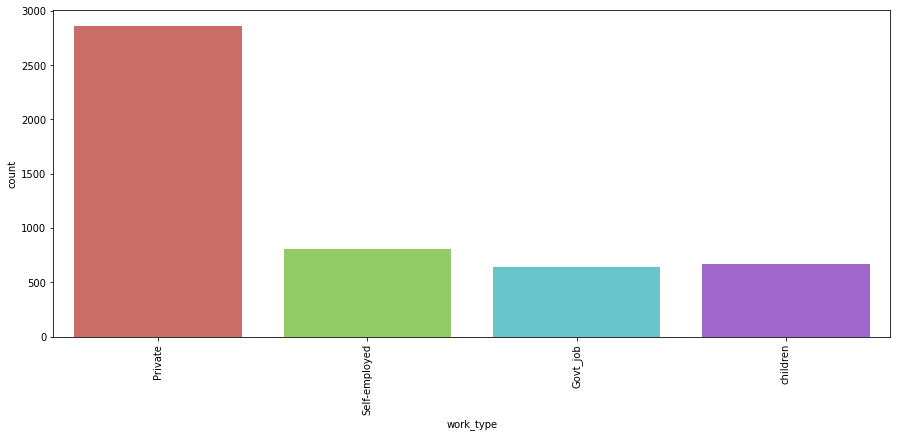

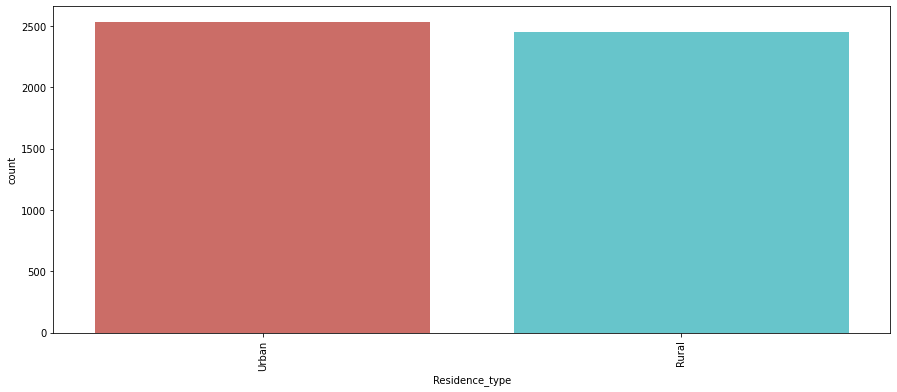

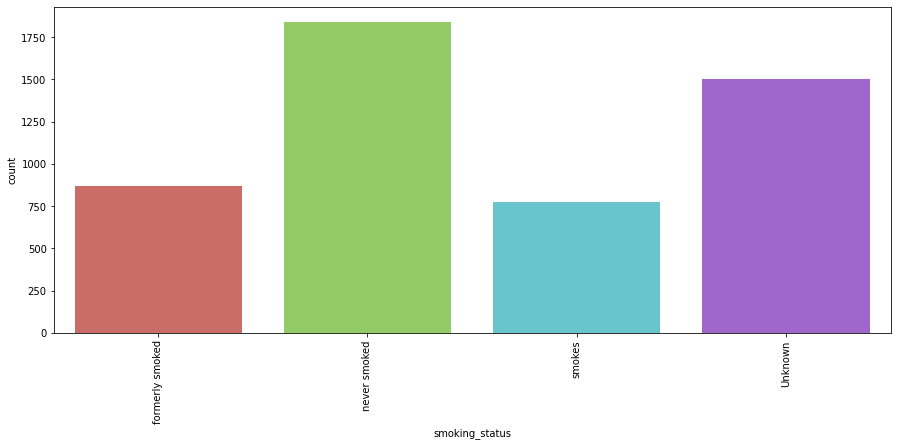

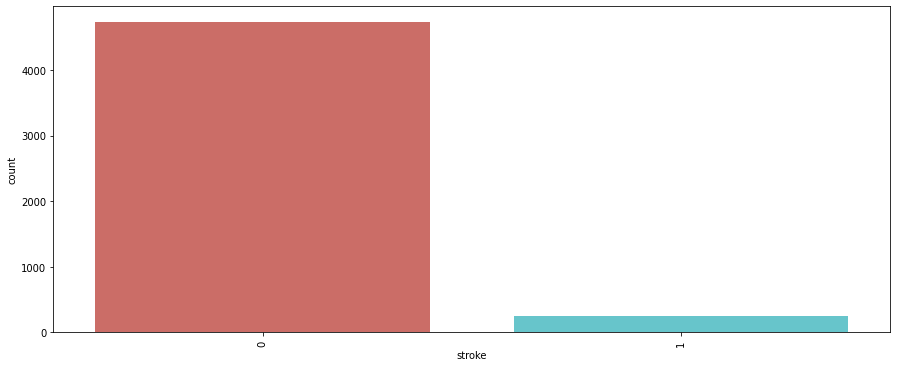

In [15]:
for i in data_cat.columns:
    plt.figure(figsize = (15,6))
    sns.countplot(data_cat[i], data = data_cat, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

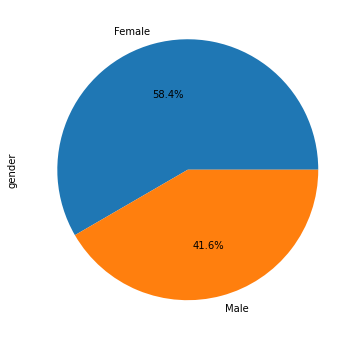

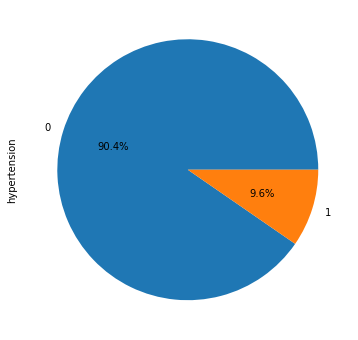

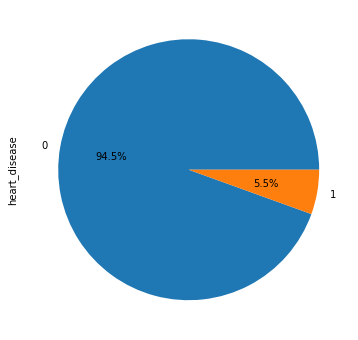

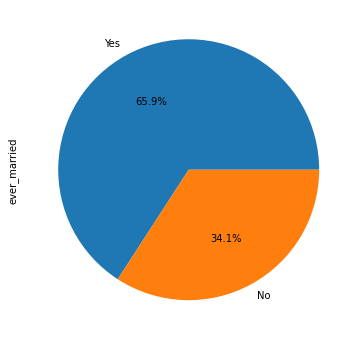

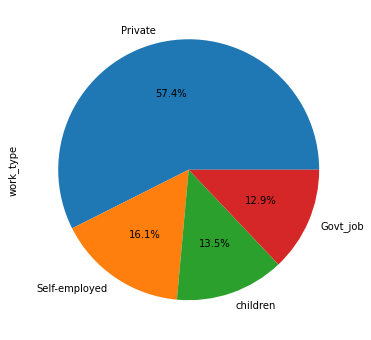

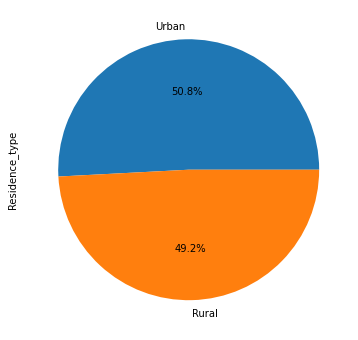

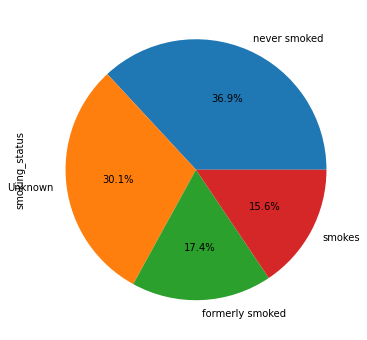

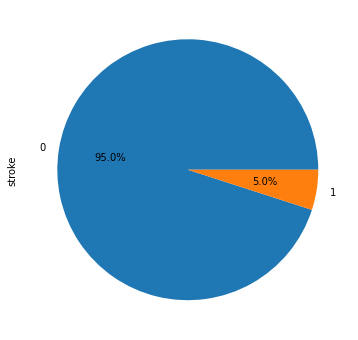

In [16]:
for i in data_cat.columns:
    plt.figure(figsize = (15,6))
    data_cat[i].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
    plt.xticks(rotation = 90)
    plt.show()

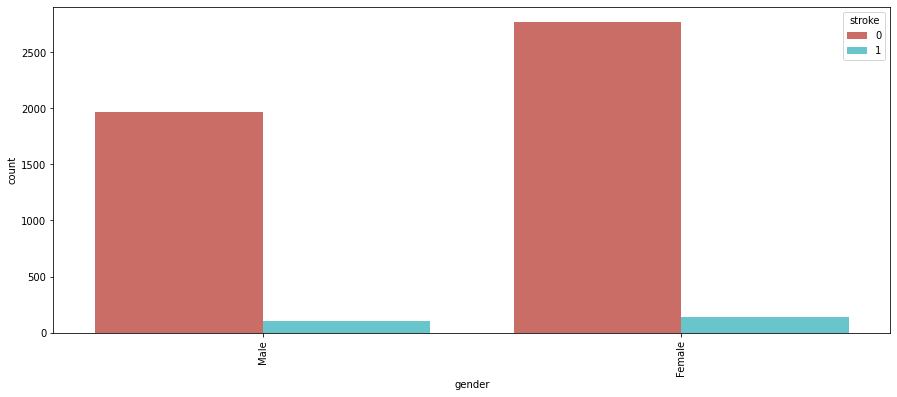

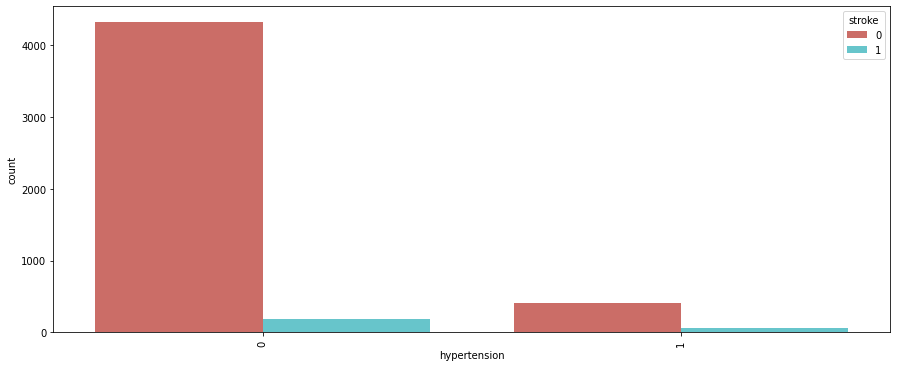

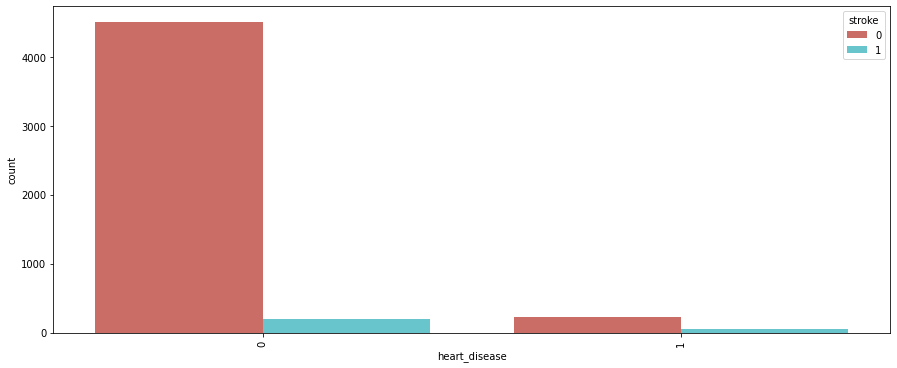

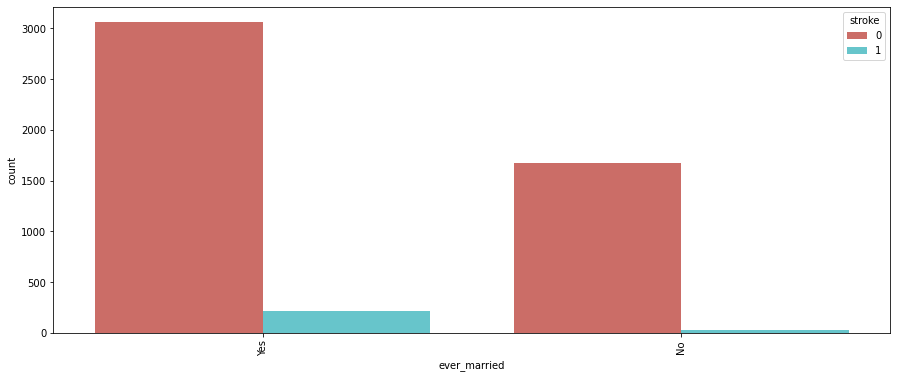

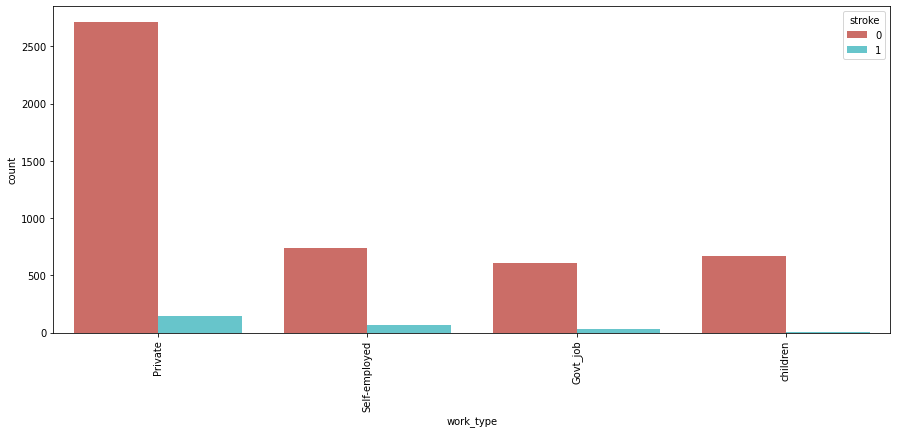

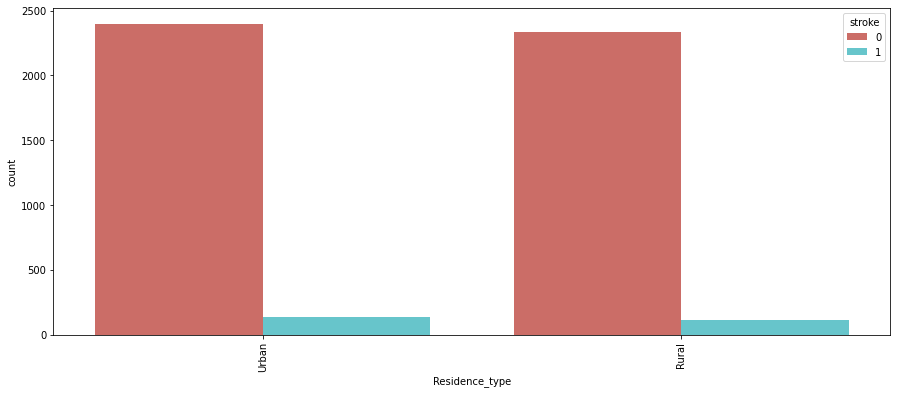

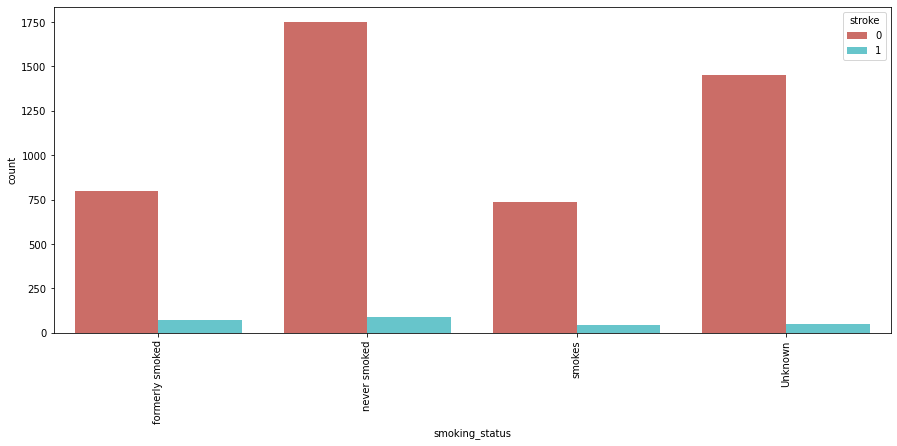

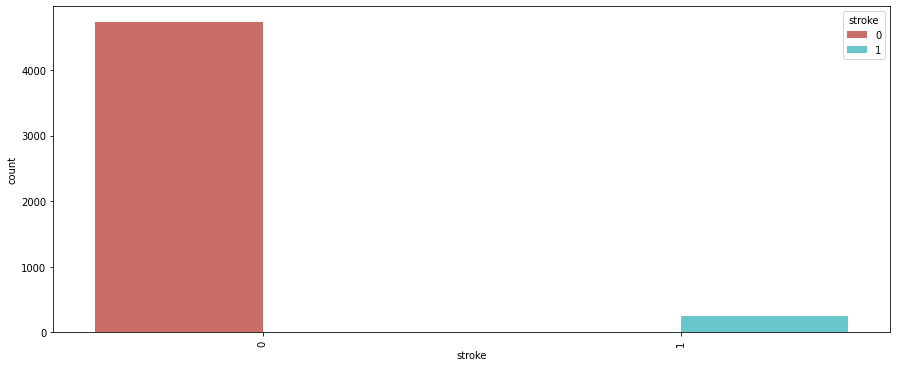

In [17]:
for i in data_cat.columns:
    plt.figure(figsize = (15,6))
    sns.countplot(data_cat[i], data = data_cat, hue = 'stroke' , palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [18]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)  

In [19]:
gender = data.groupby(data['gender'])['stroke'].sum()
data_gender = pd.DataFrame({'labels': gender.index,
                   'values': gender.values
                  })
colors = ['lightpink', 'lightskyblue']
data_gender.iplot(kind='pie',labels='labels',values='values', title='The Proportion of Stroke among Gender', colors = colors)

In [20]:
job = data.groupby(data['work_type'])['stroke'].sum()
data_job = pd.DataFrame({'labels': job.index,
                   'values': job.values
                  })
colors2= ['palegreen','paleturquoise','thistle','moccasin']
data_job.iplot(kind='pie',labels='labels',values='values', title='Work type of people who had stroke', colors = colors2, 
            pull=[0.1, 0.1, 0.1, 0.2])

In [21]:
smoke = data.groupby(data['smoking_status'])['stroke'].sum()
data_smoke = pd.DataFrame({'labels': smoke.index,
                   'values': smoke.values
                  })
data_smoke.iplot(kind='pie',labels='labels',values='values', title='Smoking status of people who had stroke', colors = colors2, 
            pull=[0.02, 0.02, 0.1, 0.02])

In [22]:
Residence = data.groupby(data['Residence_type'])['stroke'].sum()
data_Residence = pd.DataFrame({'labels': Residence.index,
                   'values': Residence.values
                  })
data_Residence.iplot(kind='pie',labels='labels',values='values', title='Residence area of people who had stroke', colors = colors2, 
            pull=[0.02, 0.02],hole = 0.3)

In [23]:
Married = data.groupby(data['ever_married'])['stroke'].sum()
data_Married = pd.DataFrame({'labels': Married.index,
                   'values': Married.values
                  })
data_Married.iplot(kind='pie',labels='labels',values='values', title='Marriage status of people who had stroke', colors = colors2, 
            pull=[0.02, 0.02],hole = 0.3)

In [24]:
data_num = data[['age', 'avg_glucose_level', 'bmi']]

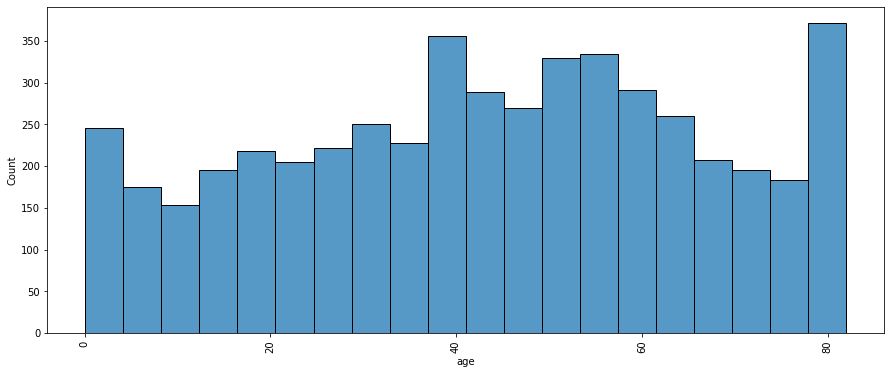

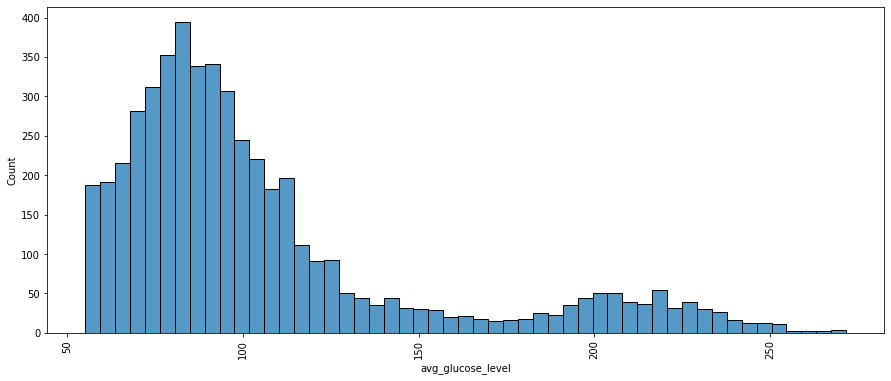

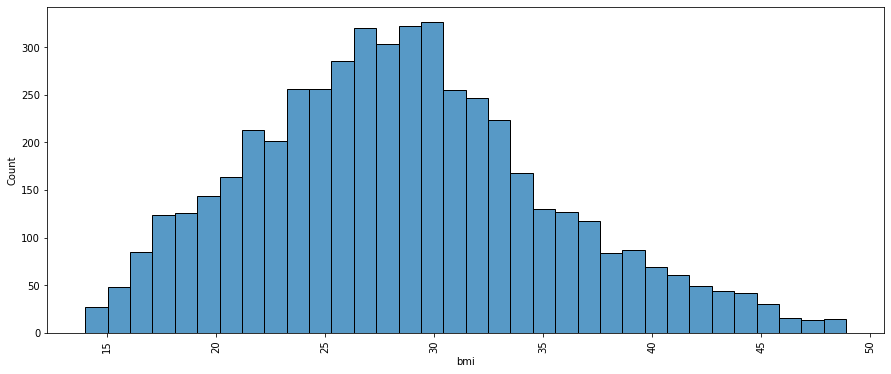

In [25]:
for i in data_num.columns:
    plt.figure(figsize = (15,6))
    sns.histplot(data_num[i], palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [26]:
stroke = data.loc[data['stroke']== 1].reset_index()
stroke["male_age"]=stroke[stroke["gender"]=="Male"]["age"]
stroke["female_age"]=stroke[stroke["gender"]=="Female"]["age"]
stroke[["male_age","female_age"]].iplot(kind="histogram", bins=20, theme="white", title="Stroke Ages",
         xTitle='Ages', yTitle='Count')

In [27]:
data['ever_married'] = [ 0 if i !='Yes' else 1 for i in data['ever_married'] ]
data['gender'] = [0 if i != 'Female' else 1 for i in data['gender']]

In [28]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
4,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [29]:
data = pd.get_dummies(data, columns = ['work_type', 'Residence_type','smoking_status'])

In [30]:
data.sample(10)

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2340,1,20.0,0,0,0,96.69,27.4,0,0,1,0,0,1,0,0,0,0,1
459,1,44.0,0,0,1,114.94,21.4,0,0,0,1,0,0,1,0,0,1,0
306,1,60.0,0,0,1,66.42,23.6,0,0,1,0,0,1,0,0,0,1,0
1243,1,64.0,0,0,1,78.85,33.9,0,1,0,0,0,1,0,0,0,1,0
3784,0,2.0,0,0,0,89.32,17.2,0,0,0,0,1,0,1,1,0,0,0
3366,1,50.0,0,0,0,112.44,31.5,0,0,1,0,0,0,1,1,0,0,0
4132,1,21.0,0,0,0,58.66,31.3,0,0,1,0,0,0,1,0,0,1,0
3756,1,59.0,0,0,1,82.14,35.6,0,0,0,1,0,0,1,0,0,0,1
2092,0,67.0,0,0,1,58.51,30.4,0,0,1,0,0,0,1,0,1,0,0
1245,1,40.0,0,0,0,78.04,32.4,0,0,1,0,0,0,1,0,0,0,1


In [31]:
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split

In [32]:
X = data.drop(['stroke'], axis = 1)
y = data['stroke']

In [33]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((3337, 17), (1644, 17))

In [34]:
classifier_log= LogisticRegression(random_state=0)  
classifier_log.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [35]:
y_pred= classifier_log.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)

In [37]:
print(cm)

[[1559    0]
 [  85    0]]


In [38]:
print('Training-set accuracy score:', classifier_log.score(X_train, y_train))

Training-set accuracy score: 0.9511537308960144


In [39]:
print('Test-set accuracy score:', classifier_log.score(X_test, y_test))

Test-set accuracy score: 0.9482968369829684


In [40]:
classifier_dt = DecisionTreeClassifier(criterion='gini', random_state=0,max_depth= 5)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [41]:
y_pred= classifier_dt.predict(X_test)

In [42]:
cm= confusion_matrix(y_test,y_pred)

In [43]:
print(cm)

[[1559    0]
 [  81    4]]


In [44]:
print('Training-set accuracy score:', classifier_dt.score(X_train, y_train))

Training-set accuracy score: 0.9526520827090201


In [45]:
print('Training-set accuracy score:', classifier_dt.score(X_test, y_test))

Training-set accuracy score: 0.9507299270072993


In [46]:
classifier_rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier_rf.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [47]:
y_pred= classifier_rf.predict(X_test)

In [48]:
cm= confusion_matrix(y_test,y_pred)

In [49]:
print(cm)

[[1552    7]
 [  85    0]]


In [50]:
print('Training-set accuracy score:', classifier_rf.score(X_train, y_train))

Training-set accuracy score: 0.9919089002097693


In [51]:
print('Training-set accuracy score:', classifier_rf.score(X_test, y_test))

Training-set accuracy score: 0.9440389294403893
